In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
# Load the CSV file into a DataFrame
df = pd.read_csv('SMARTPHONE RETAIL OUTLET SALE DATA.csv', encoding='ascii')
df.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE


In [48]:
# Summarize the statistics of numerical columns
df.describe()

,QUARTER,Quantity,Price,Amount
count,6421.000000,6421.000000,6421.000000,6421.000000
mean,2.249338,1.058246,18295.175739,19255.968355
std,1.000452,0.949686,19855.194755,20608.895584
min,1.000000,1.000000,410.710000,915.260000
25%,1.000000,1.000000,5026.780000,5892.860000
50%,2.000000,1.000000,13776.780000,14284.820000
75%,3.000000,1.000000,20919.640000,21419.640000
max,4.000000,30.000000,104767.860000,230803.570000


In [49]:
# Check for missing values
df.isnull().sum()

Date                        0
F.Y                         0
QUARTER                     0
P_NO                        1
PAYMENT TYPE                0
TYPE OF PRODUCT             0
Quantity                    0
Price                       0
Amount                      0
TYPE OF ACCESSORY/MOBILE    0
dtype: int64

In [50]:
# Convert the Date column to datetime
# This will help in time series analysis
# Also, we will sort the dataframe based on the Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')

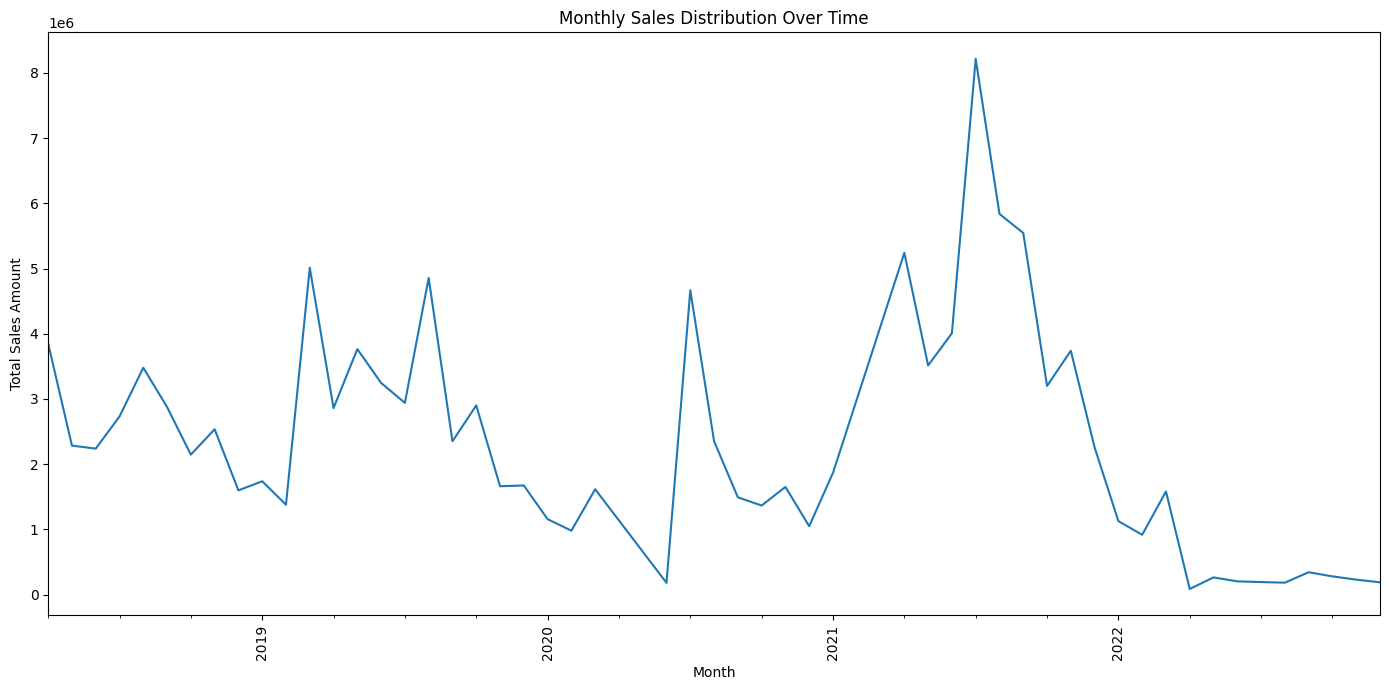

In [51]:
# Plotting the distribution of sales over time
plt.figure(figsize=(14, 7))
df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().plot(kind='line')
plt.title('Monthly Sales Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

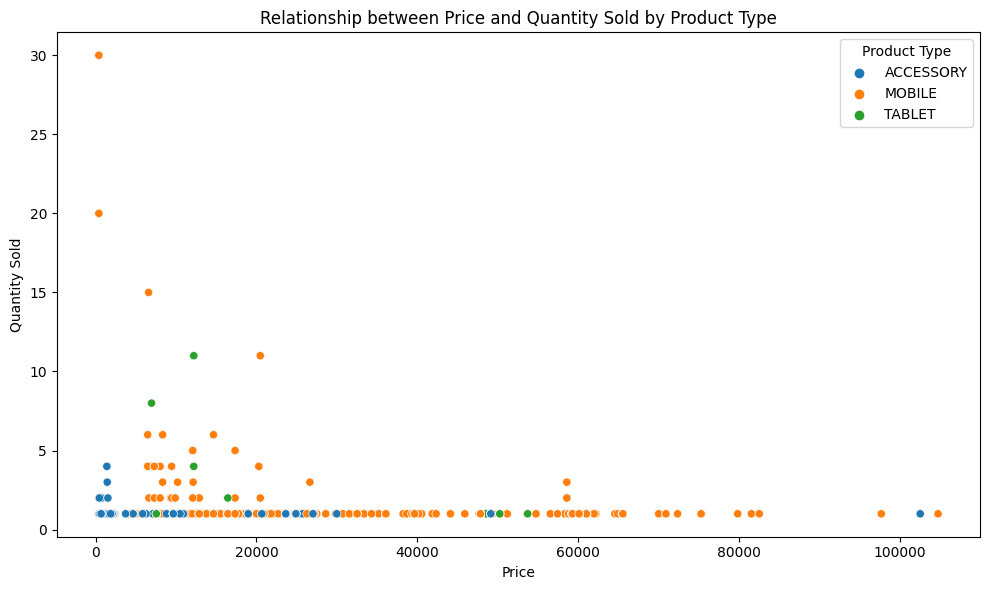

(PAYMENT TYPE
 MOBILE PAYMENTS    1832
 DEBIT              1787
 CREDIT             1630
 CASH               1172
 Name: count, dtype: int64,
 TYPE OF PRODUCT
 MOBILE       4985
 ACCESSORY    1293
 TABLET        143
 Name: count, dtype: int64)

In [52]:


# Payment type distribution
payment_type_counts = df['PAYMENT TYPE'].value_counts()

# Product type distribution
product_type_counts = df['TYPE OF PRODUCT'].value_counts()

# Relationship between price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Quantity', hue='TYPE OF PRODUCT')
plt.title('Relationship between Price and Quantity Sold by Product Type')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

(payment_type_counts, product_type_counts)

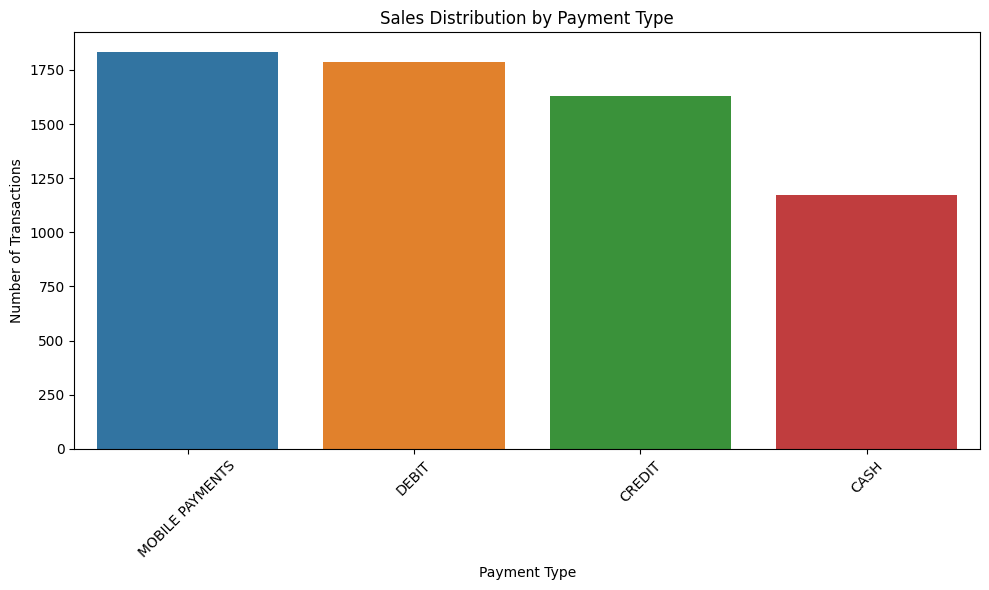

In [53]:


# Analyzing sales by payment type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PAYMENT TYPE', order = df['PAYMENT TYPE'].value_counts().index)
plt.title('Sales Distribution by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





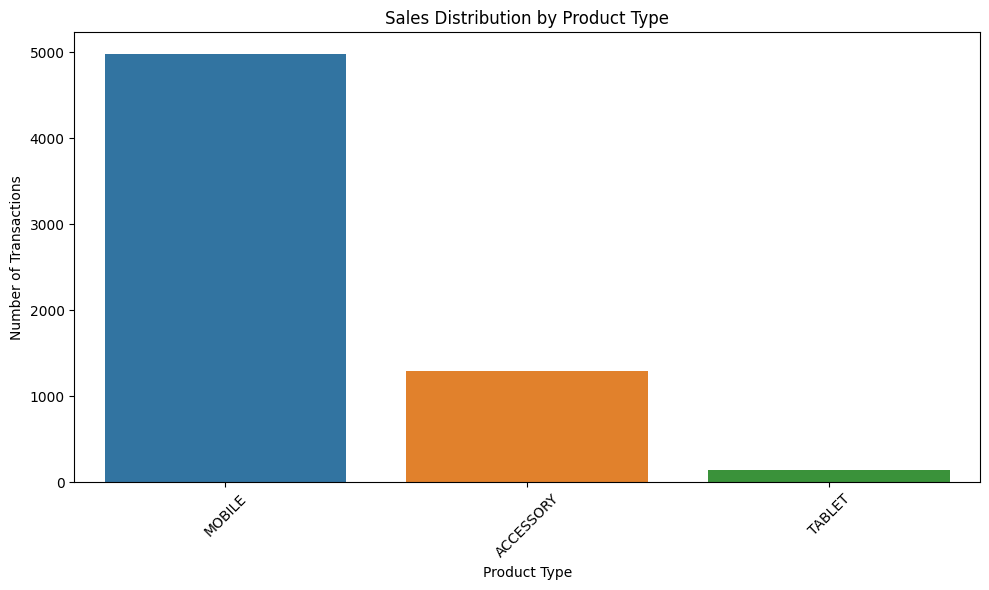

In [54]:
# Analyzing sales by product type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TYPE OF PRODUCT', order = df['TYPE OF PRODUCT'].value_counts().index)
plt.title('Sales Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Analyzing the average amount spent per transaction by payment type
avg_amount_by_payment = df.groupby('PAYMENT TYPE')['Amount'].mean().sort_values(ascending=False)

# Analyzing the average price per unit by product type
avg_price_by_product = df.groupby('TYPE OF PRODUCT')['Price'].mean().sort_values(ascending=False)

(avg_amount_by_payment, avg_price_by_product)

(PAYMENT TYPE
 DEBIT              21561.662602
 CREDIT             21129.185632
 MOBILE PAYMENTS    20363.104045
 CASH               11404.524360
 Name: Amount, dtype: float64,
 TYPE OF PRODUCT
 MOBILE       22100.126120
 TABLET       17292.621119
 ACCESSORY     3736.542838
 Name: Price, dtype: float64)

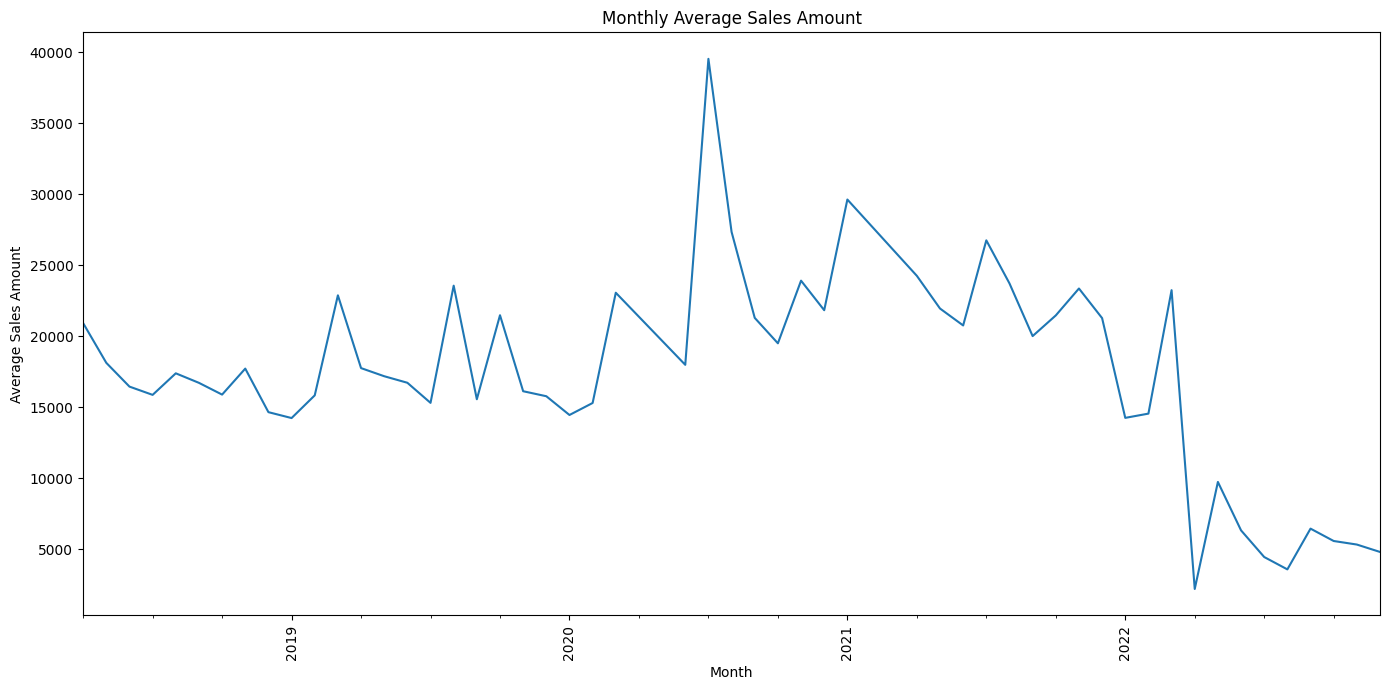

In [56]:
# Monthly average sales amount
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_avg_sales = df.groupby('Month_Year')['Amount'].mean()

# Plotting the monthly average sales amount
plt.figure(figsize=(14, 7))
monthly_avg_sales.plot(kind='line')
plt.title('Monthly Average Sales Amount')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [57]:
# Correlation between price and quantity
correlation_price_quantity = df[['Price', 'Quantity']].corr()

# Top-selling products by quantity
top_selling_quantity = df.groupby('TYPE OF ACCESSORY/MOBILE')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top-selling products by revenue
top_selling_revenue = df.groupby('TYPE OF ACCESSORY/MOBILE')['Amount'].sum().sort_values(ascending=False).head(10)

( correlation_price_quantity, top_selling_quantity, top_selling_revenue)

(             Price  Quantity
 Price     1.000000 -0.036864
 Quantity -0.036864  1.000000,
 TYPE OF ACCESSORY/MOBILE
 BUDGET PHONE              2349
 MIDRANGE PHONE            2006
 FLAGSHIP PHONE             619
 CHARGER                    336
 WIRELESS HEADSET           309
 COVER                      276
 PREMIUM MIDRANGE PHONE     240
 GALAXY WATCH               134
 BATTERY                    123
 BUDGET TABLET              103
 Name: Quantity, dtype: int64,
 TYPE OF ACCESSORY/MOBILE
 MIDRANGE PHONE            39538931.27
 FLAGSHIP PHONE            37689851.73
 BUDGET PHONE              18766235.08
 PREMIUM MIDRANGE PHONE     9617469.99
 LUXURY PHONE               9556670.54
 GALAXY WATCH               2660638.25
 MIDRANGE TAB               1277501.75
 BUDGET TABLET              1018982.88
 COVER                       715505.28
 CHARGER                     672831.21
 Name: Amount, dtype: float64)

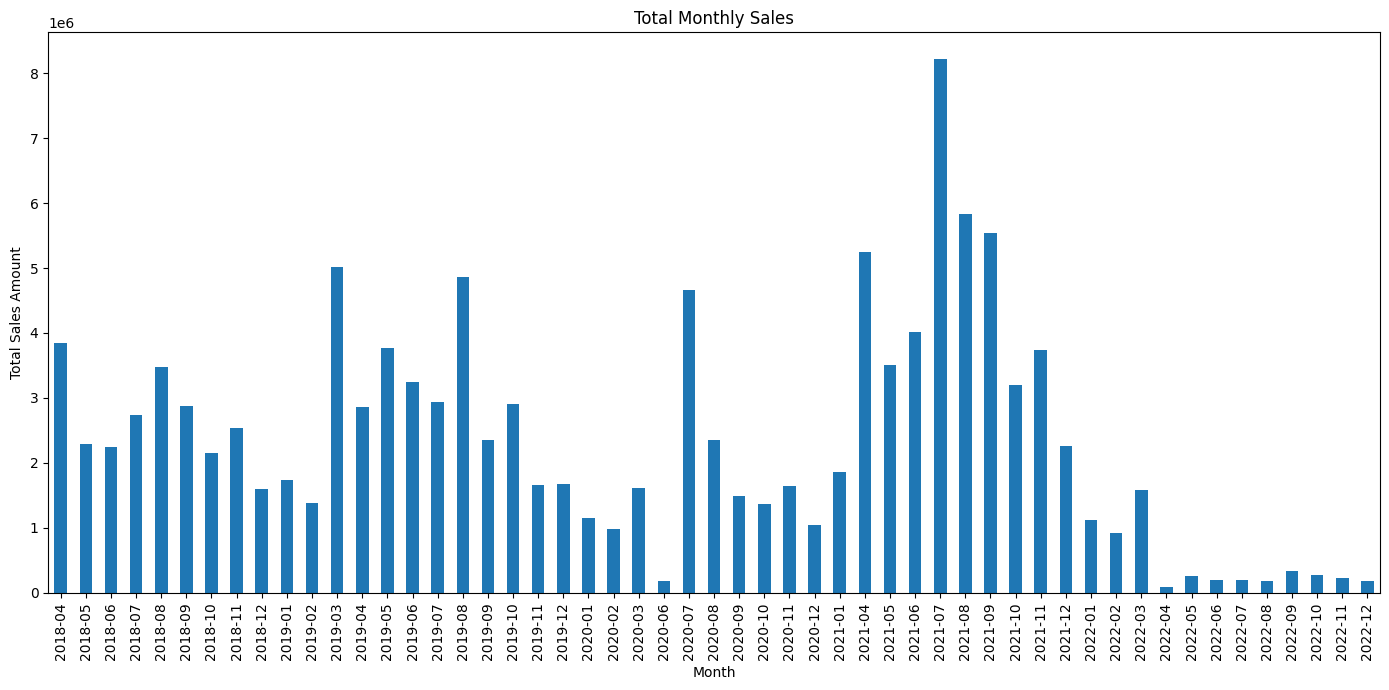

In [58]:
# Seasonality in monthly sales data
monthly_sales_sum = df.groupby('Month_Year')['Amount'].sum()

# Plotting the total monthly sales to observe seasonality
plt.figure(figsize=(14, 7))
monthly_sales_sum.plot(kind='bar')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



<Figure size 1400x700 with 0 Axes>

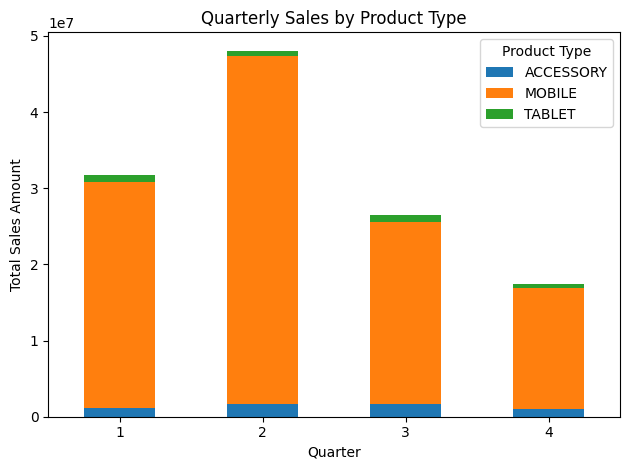

In [59]:
# Sales performance of different product categories over the quarters
quarterly_sales_by_product = df.groupby(['QUARTER', 'TYPE OF PRODUCT'])['Amount'].sum().unstack()

# Plotting the sales performance of different product categories over the quarters
plt.figure(figsize=(14, 7))
quarterly_sales_by_product.plot(kind='bar', stacked=True)
plt.title('Quarterly Sales by Product Type')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



<Figure size 1400x700 with 0 Axes>

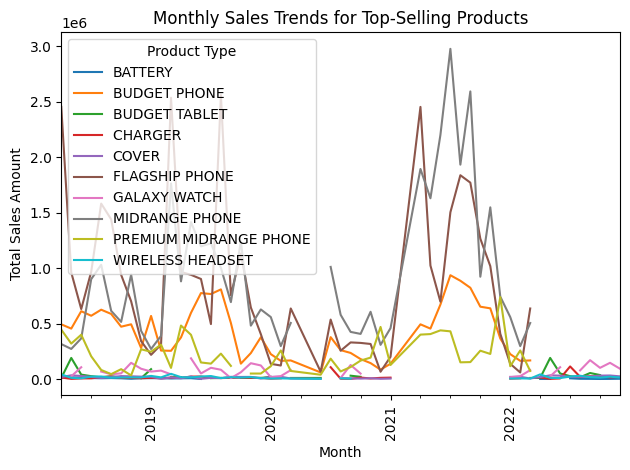

In [60]:
# Sales trends for the top-selling products over time
top_products = top_selling_quantity.index.tolist()
monthly_sales_top_products = df[df['TYPE OF ACCESSORY/MOBILE'].isin(top_products)].groupby(['Month_Year', 'TYPE OF ACCESSORY/MOBILE'])['Amount'].sum().unstack()

# Plotting the sales trends for the top-selling products
plt.figure(figsize=(14, 7))
monthly_sales_top_products.plot(kind='line')
plt.title('Monthly Sales Trends for Top-Selling Products')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Type', loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

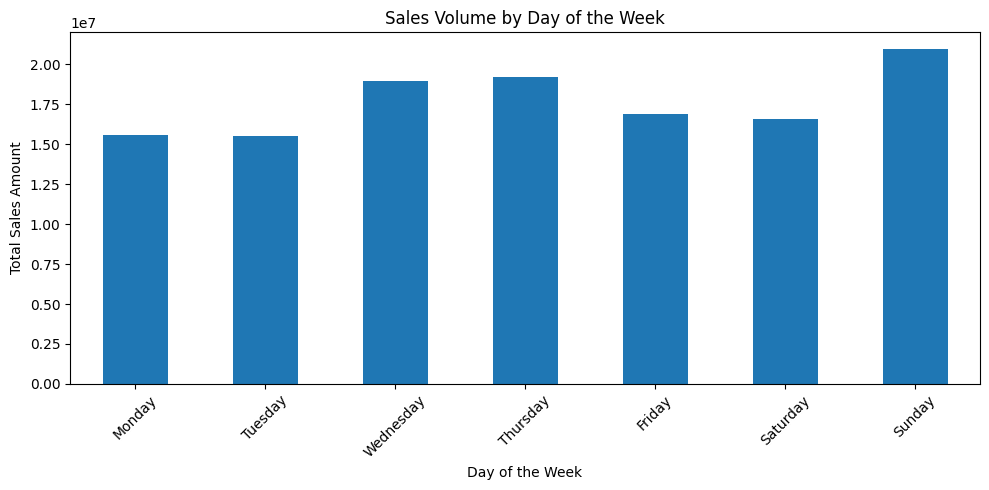

In [61]:

# Relationship between day of the week and sales volume
# First, we need to convert 'Date' to datetime format to extract the day of the week
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Day_of_Week'] = df['Date'].dt.day_name()
sales_by_day_of_week = df.groupby('Day_of_Week')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting sales by day of the week
plt.figure(figsize=(10, 5))
sales_by_day_of_week.plot(kind='bar')
plt.title('Sales Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
df.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE,Month_Year,Day_of_Week
0,2018-04-01,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER,2018-04,Sunday
1,2018-04-01,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET,2018-04,Sunday
2,2018-04-01,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE,2018-04,Sunday
3,2018-04-01,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE,2018-04,Sunday
4,2018-04-01,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE,2018-04,Sunday


Lets convert these into fewer columns so that we can have a clean data for power bi import

In [63]:
# Remove the row with the missing 'P_NO' value
df_cleaned = df.dropna(subset=['P_NO'])
df_cleaned.isnull().sum()

Date                        0
F.Y                         0
QUARTER                     0
P_NO                        0
PAYMENT TYPE                0
TYPE OF PRODUCT             0
Quantity                    0
Price                       0
Amount                      0
TYPE OF ACCESSORY/MOBILE    0
Month_Year                  0
Day_of_Week                 0
dtype: int64

In [64]:
df_cleaned.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE,Month_Year,Day_of_Week
0,2018-04-01,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER,2018-04,Sunday
1,2018-04-01,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET,2018-04,Sunday
2,2018-04-01,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE,2018-04,Sunday
3,2018-04-01,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE,2018-04,Sunday
4,2018-04-01,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE,2018-04,Sunday


Since FY ,P_NO quarter , montg_year and day_of_week can be derived from data lets delete these columns


In [65]:
# List of columns to drop
columns_to_drop = ['F.Y',  'QUARTER', 'Month_Year', 'Day_of_Week']
# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned.head()


,Date,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE
0,2018-04-01,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,2018-04-01,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,2018-04-01,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,2018-04-01,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,2018-04-01,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE


In [66]:

df.rename(columns={
    'P_NO': 'Product ID',
    'PAYMENT TYPE': 'PaymentType',
    'TYPE OF PRODUCT': 'Product Type',
    'TYPE OF ACCESSORY/MOBILE': 'Product Sub-Type'
}, inplace=True)

# Now your DataFrame df has the columns renamed.
# You can then save it back to Excel if needed:
df.to_excel('Smartphone Retail Oullet Sale Data.xlsx', index=False)